In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
currency10a = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/Datasets/currency10a.txt', delimiter = '\t')
currency10b = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/Datasets/currency10b.txt', delimiter = '\t')

In [0]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]

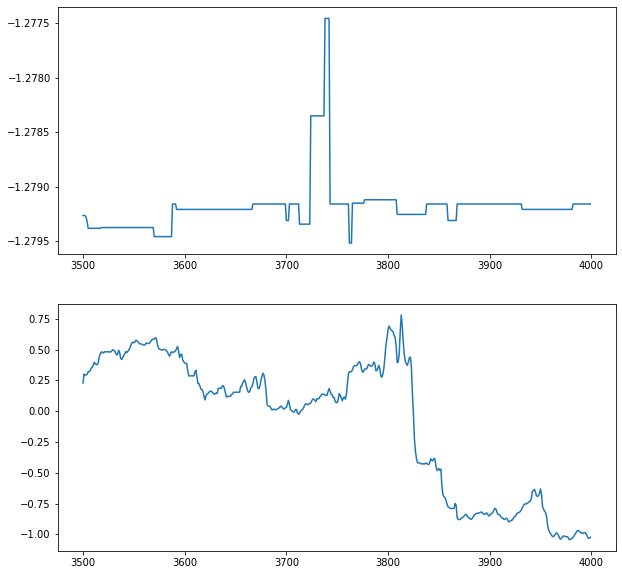

In [42]:
plt.subplot(211)
plt.plot(currency10a[3500:4000])
plt.subplot(212)
plt.plot(currency10b[3500:4000])

plt.show()

In [43]:
currency10a.shape

(44850, 1)

In [44]:
currency10b.shape

(44850, 1)

In [45]:
currency10b

,currency10b
0,-0.787447
1,-0.781780
2,-0.773533
3,-0.744427
4,-0.741640
...,...
44845,-0.917488
44846,-0.915469
44847,-0.910197
44848,-0.925631


In [56]:
temp_currency10a = currency10a[1024:2048].to_numpy()
temp_currency10b = currency10b[1024:2048].to_numpy()
temp_currency10a = temp_currency10a.reshape(-1,)
temp_currency10b = temp_currency10b.reshape(-1,)

temp_currency10a.shape

(1024,)

In [57]:
temp_currency10a.mean()
#type(np.fft.fft(temp_currency10a))

0.40075277808593757

In [0]:
ffted_currency10a = np.fft.fft(temp_currency10a) #/ temp_currency10a.mean().to_numpy()# / len(currency10a)
a = np.fft.ifft(ffted_currency10a)
#ffted_magnitude_10a = abs(ffted_currency10a)
#ffted_currency10b = np.fft.fft(temp_currency10b) #/ temp_currency10b.mean().to_numpy()# / len(temp_currency10b)# / len(currency10b)
#ffted_magnitude_10b = abs(ffted_currency10b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


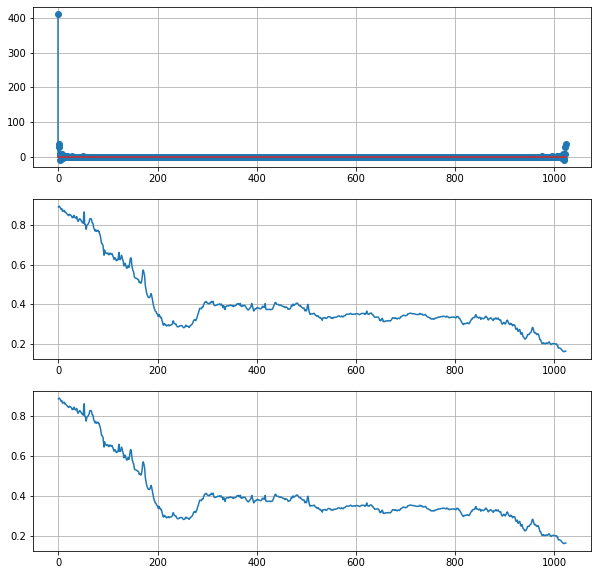

In [67]:
plt.subplot(3,1,1)
plt.stem(ffted_currency10a.real)
#plt.ylim(0.0,10.0)
plt.grid()

plt.subplot(3,1,2)
plt.plot(a)
#plt.ylim(0.0,10.0)
plt.grid()

plt.subplot(3,1,3)
plt.plot(temp_currency10a)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


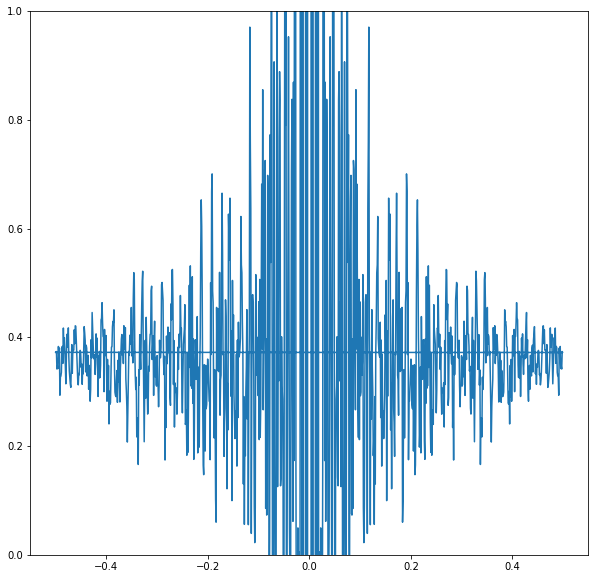

In [81]:
t = temp_currency10a
sp = np.fft.fft(t)
freq = np.fft.fftfreq(t.shape[-1])
plt.ylim(0.0,1.0)
plt.plot(freq, sp)

plt.show()

IndexError: ignored

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


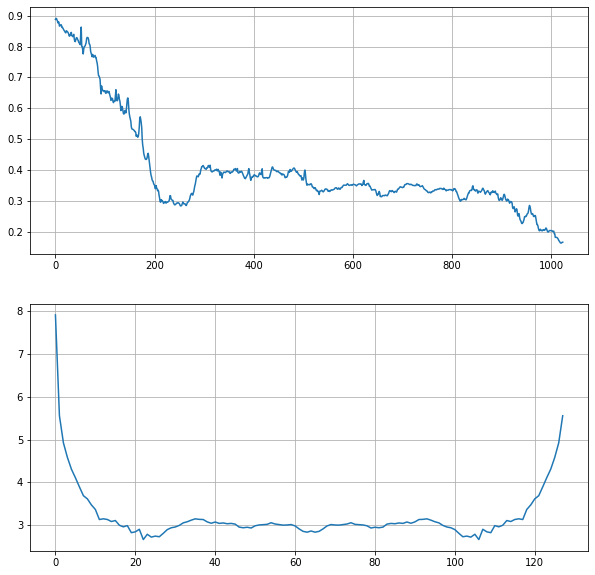

In [14]:
ind = np.argpartition(ffted_magnitude_10a, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_10a[:128]
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(temp_currency10a)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(0.0,2.0)
plt.grid()

plt.show()

In [0]:
temp_currency10a = currency10a[4450:4500].to_numpy()
temp_currency10a = temp_currency10a.reshape(-1,)

In [0]:
ffted_currency10a = np.fft.fft(temp_currency10a) #/ temp_currency10a.mean().to_numpy()# / len(currency10a)
ffted_magnitude_10a = abs(ffted_currency10a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


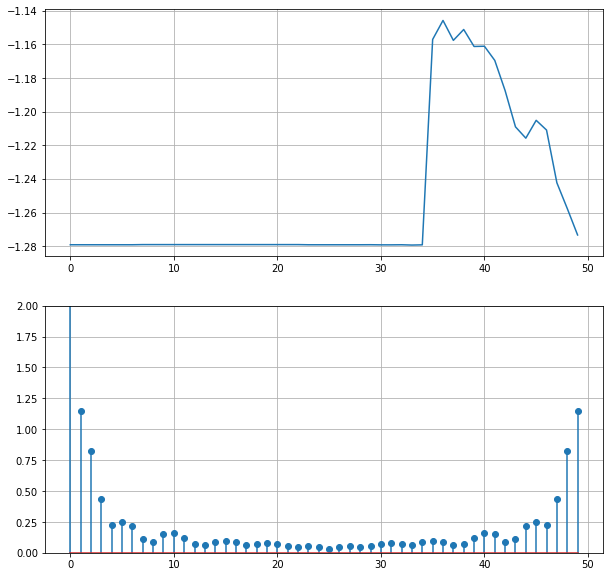

In [17]:
plt.subplot(2,1,1)
plt.plot(temp_currency10a)
plt.grid()

plt.subplot(2,1,2)
plt.stem(ffted_magnitude_10a)
plt.ylim(0.0,2.0)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


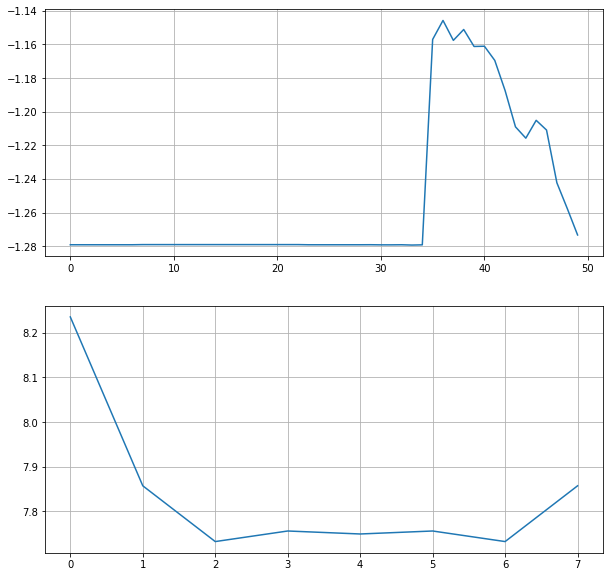

In [18]:
ind = np.argpartition(ffted_magnitude_10a, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_10a[:8]
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(temp_currency10a)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(0.0,2.0)
plt.grid()

plt.show()

In [0]:
temp_currency10a = currency10a[4450:4460].to_numpy()
temp_currency10a = temp_currency10a.reshape(-1,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


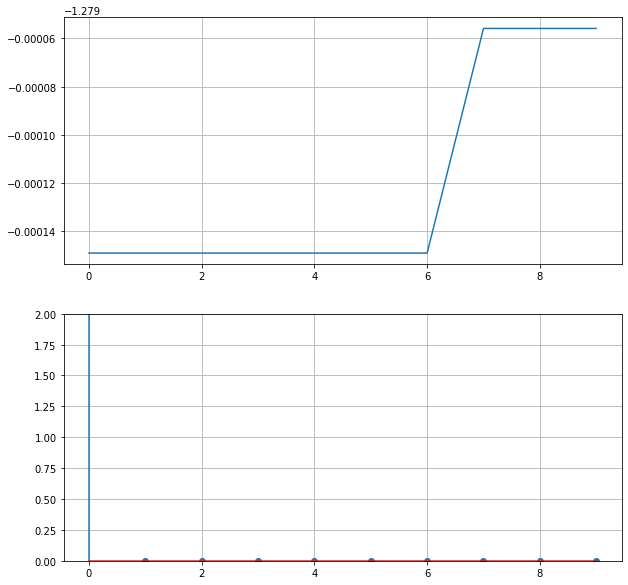

In [20]:
ffted_currency10a = np.fft.fft(temp_currency10a) #/ temp_currency10a.mean().to_numpy()# / len(currency10a)
ffted_magnitude_10a = abs(ffted_currency10a)

plt.subplot(2,1,1)
plt.plot(temp_currency10a)
plt.grid()

plt.subplot(2,1,2)
plt.stem(ffted_magnitude_10a)
plt.ylim(0.0,2.0)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


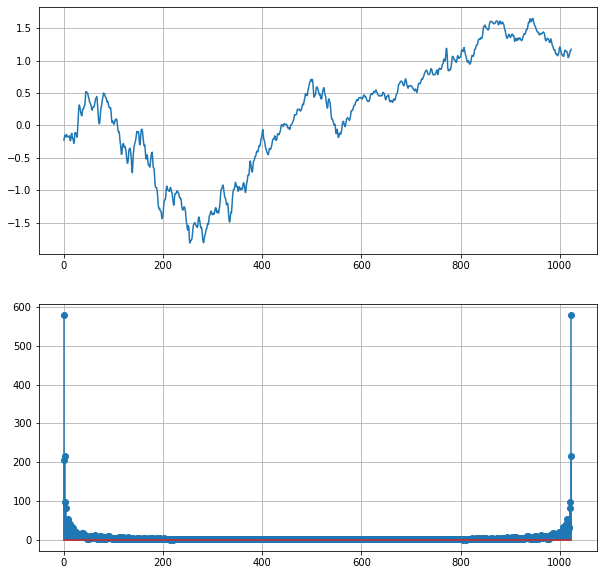

In [21]:
plt.subplot(2,1,1)
plt.plot(temp_currency10b)
plt.grid()

plt.subplot(2,1,2)
plt.stem(ffted_magnitude_10b)
#plt.ylim(1.5,2.5)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


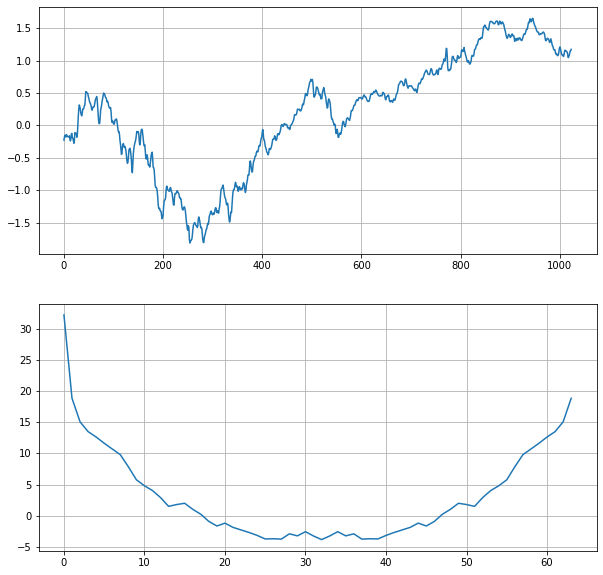

In [22]:
ind = np.argpartition(ffted_magnitude_10b, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_10b[:64]
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(temp_currency10b)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(0.0,2.0)
plt.grid()

plt.show()

In [23]:
type(temp_currency10a)

numpy.ndarray

In [24]:
temp_currency10a.mean()

-1.27912114

In [25]:
LSF5_10= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/Datasets/LSF5_10.txt', delimiter = '\t')
LSF5_10

,LSF5_10
0,-7615.0635
1,-7746.5669
2,-7662.4897
3,-7670.7007
4,-7666.8730
...,...
180209,0.0000
180210,0.0000
180211,0.0000
180212,0.0000


In [0]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]

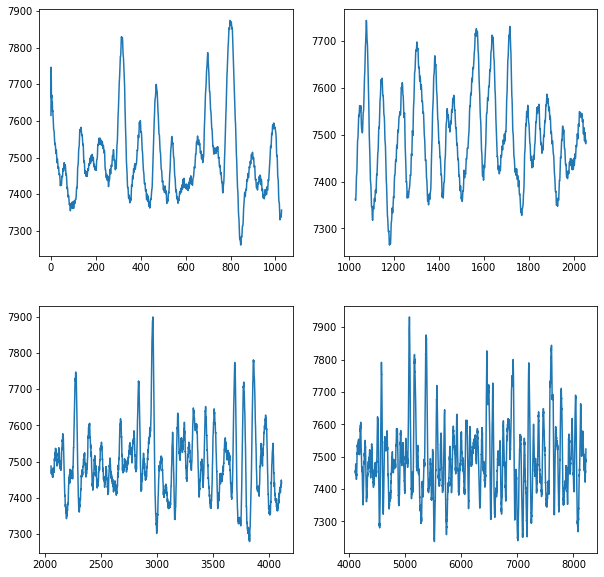

In [27]:
plt.subplot(221)
plt.plot(abs(LSF5_10[:1028]))
plt.subplot(222)
plt.plot(abs(LSF5_10[1028:2056]))
plt.subplot(223)
plt.plot(abs(LSF5_10[2056:4112]))
plt.subplot(224)
plt.plot(abs(LSF5_10[4112:8224]))

plt.show()

In [0]:
a = np.copy(abs(LSF5_10[ :1028]))
a = a.reshape(-1,)
b = np.copy(abs(LSF5_10[1028: 2056]))
b = b.reshape(-1,)
c = np.copy(abs(LSF5_10[2056: 4112]))
c = c.reshape(-1,)
d = np.copy(abs(LSF5_10[4112: 8224]))
d = d.reshape(-1,)

In [0]:
ffted_a = np.fft.fft(a)
ffted_b = np.fft.fft(b)
ffted_c = np.fft.fft(c)
ffted_d = np.fft.fft(d)

ffted_magnitude_a = abs(ffted_a)
ffted_magnitude_b = abs(ffted_b)
ffted_magnitude_c = abs(ffted_c)
ffted_magnitude_d = abs(ffted_d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


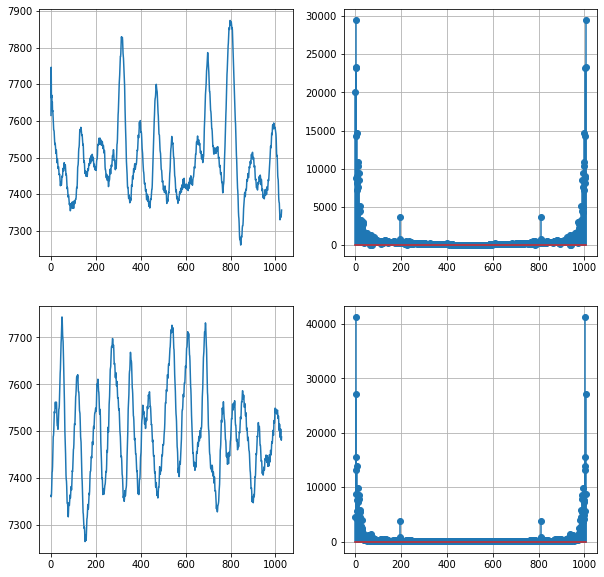

In [30]:
plt.subplot(2,2,1)
plt.plot(a)
plt.grid()

plt.subplot(2,2,2)
plt.stem(ffted_magnitude_a[10:-10])
#plt.ylim(0.0, 1.0)
plt.grid()

plt.subplot(2,2,3)
plt.plot(b)
plt.grid()

plt.subplot(2,2,4)
plt.stem(ffted_magnitude_b[10:-10])
#plt.ylim(0.0, 2.0)
plt.grid()


plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


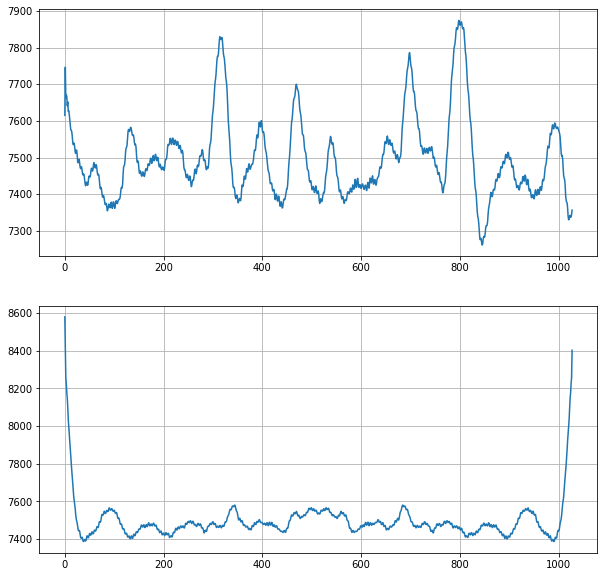

In [31]:
ind = np.argpartition(ffted_magnitude_a, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_a
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(a)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(7.0,7.4)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


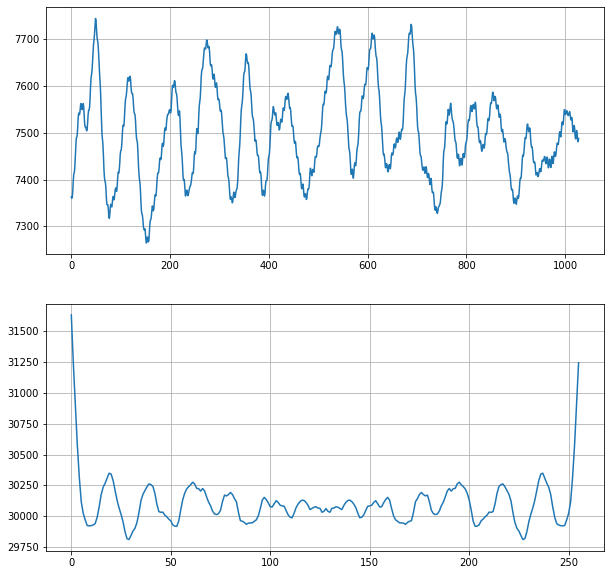

In [32]:
ind = np.argpartition(ffted_magnitude_b, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_b[:256]
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(b)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(0.0,20.0)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


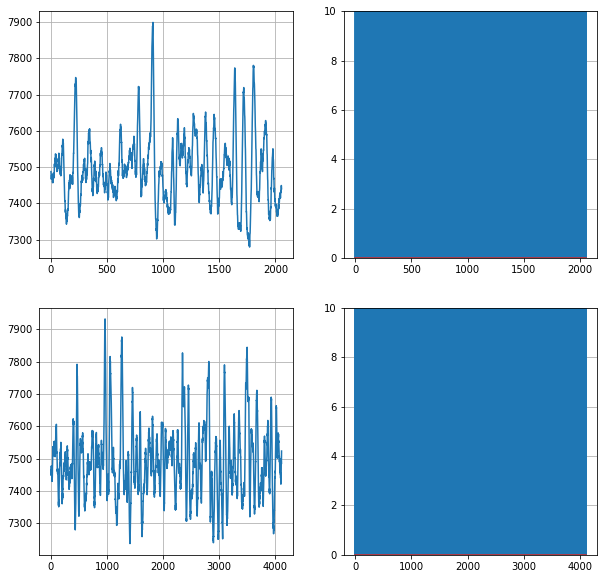

In [33]:
plt.subplot(2,2,1)
plt.plot(c)
plt.grid()

plt.subplot(2,2,2)
plt.stem(ffted_magnitude_c)
plt.ylim(0.0, 10.0)
plt.grid()

plt.subplot(2,2,3)
plt.plot(d)
plt.grid()

plt.subplot(2,2,4)
plt.stem(ffted_magnitude_d)
plt.ylim(0.0, 10.0)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


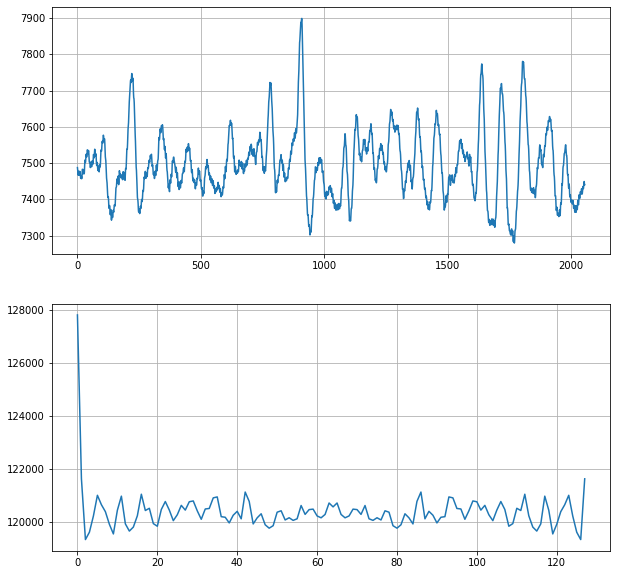

In [34]:
ind = np.argpartition(ffted_magnitude_c, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_c[:128]
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(c)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(0.0,20.0)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


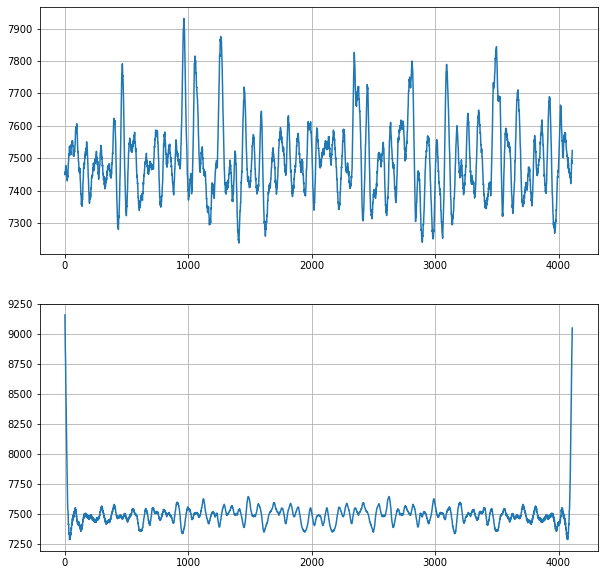

In [36]:
ind = np.argpartition(ffted_magnitude_d, -10)[-10:] #np.array
#temp = ffted_magnitude_10a[ind]
temp = ffted_magnitude_d
temp_iffted = np.fft.ifft(temp)
pd_temp_iffted = pd.DataFrame(data = temp_iffted)

plt.subplot(2,1,1)
plt.plot(d)
plt.grid()

plt.subplot(2,1,2)
plt.plot(pd_temp_iffted)
#plt.ylim(116.0,118.0)
plt.grid()

plt.show()